In [1]:
%%html
<style>
.output {
    overflow-y: scroll !important;
    overflow-x: scroll !important;
}
</style>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install ijson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
import pandas as pd
from tqdm import tqdm
pd.set_option('display.max_colwidth', None)

In [5]:
string = """aPr,string,Ask Price that seller willing to take for the scrip
bPr,string,Bid Price that buyer willing to pay for the scrip
aSz,string,Ask size/quantity for trading
bSz,string,Bid size/quantity for trading
sym,string,Actual symbol name of the scrip
avgPr,string,Average trading price of the equity or derivative
c,string,Close value of market snapshot
h,string,High value of market snapshot
l,string,Low value of market snapshot
o,string,Opening price of a market snapshot
oI,string,Open interest is the total number of outstanding derivative contracts that have not been settled
oIChg,string,open interest changed value
ch,string,Change value is the difference between the current value and the previous day's market close
chPer,string,Percentage of change between the current value and the previous day's market close
lTrdT,string,Time of the last transaction
ltp,string,Price at which last transaction / trade is done
ltq,string,Quantity of last transaction
ltt,string,Last transaction time in milliseconds
lttUTC,string,Last transaction time in UTC time zone format
tBQ,string,Total quantity of BUY transaction
tSQ,string,Total quantity of SELL transaction
ttv,string,Total volume of trading done
vol,string,Total amount of a security traded Today
yH,string,52 week high
yL,string,52 week low"""

In [6]:
df = pd.DataFrame([x.split(',') for x in string.split('\n')], columns=["Name", "Type", "Description"])
df

,Name,Type,Description
0,aPr,string,Ask Price that seller willing to take for the scrip
1,bPr,string,Bid Price that buyer willing to pay for the scrip
2,aSz,string,Ask size/quantity for trading
3,bSz,string,Bid size/quantity for trading
4,sym,string,Actual symbol name of the scrip
5,avgPr,string,Average trading price of the equity or derivative
6,c,string,Close value of market snapshot
7,h,string,High value of market snapshot
8,l,string,Low value of market snapshot
9,o,string,Opening price of a market snapshot


In [7]:
import ijson
train_file = "/content/drive/MyDrive/BankNifty dataset/BANKNIFTY.json"

In [8]:
%%time
data = ijson.parse(open(train_file, 'r'))

CPU times: user 0 ns, sys: 4.7 ms, total: 4.7 ms
Wall time: 10.6 ms


Each field starts with _id field (targeting this as a split point)

In [9]:
i = 0
limit = 130
for x in data:
    if i > limit:
      break
    i += 1
    print(x)

('', 'start_array', None)
('item', 'start_map', None)
('item', 'map_key', '_id')
('item._id', 'start_map', None)
('item._id', 'map_key', '$oid')
('item._id.$oid', 'string', '608242bd22ec5cd64382c299')
('item._id', 'end_map', None)
('item', 'map_key', 'aPr')
('item.aPr', 'start_array', None)
('item.aPr.item', 'string', '0.00')
('item.aPr', 'end_array', None)
('item', 'map_key', 'aSz')
('item.aSz', 'start_array', None)
('item.aSz.item', 'string', '0')
('item.aSz', 'end_array', None)
('item', 'map_key', 'avgPr')
('item.avgPr', 'start_array', None)
('item.avgPr.item', 'string', '31481.44')
('item.avgPr', 'end_array', None)
('item', 'map_key', 'bPr')
('item.bPr', 'start_array', None)
('item.bPr.item', 'string', '0.00')
('item.bPr', 'end_array', None)
('item', 'map_key', 'bSz')
('item.bSz', 'start_array', None)
('item.bSz.item', 'string', '0')
('item.bSz', 'end_array', None)
('item', 'map_key', 'c')
('item.c', 'start_array', None)
('item.c.item', 'string', '31249.30')
('item.c', 'end_array',

In [10]:
i = 0
limit = 130
for x in data:
    if i > limit:
      break
    i += 1
    if len(x[0].split(".")) == 3:
      print(x)

('item.bSz.item', 'string', '50')
('item.c.item', 'string', '31873.20')
('item.ch.item', 'string', '-322.00')
('item.chPer.item', 'string', '-1.01')
('item.h.item', 'string', '32133.30')
('item.l.item', 'string', '31551.20')
('item.lTrdT.item', 'string', '23 Apr 2021, 09:15:00 AM')
('item.ltp.item', 'string', '31551.20')
('item.ltq.item', 'string', '25')
('item.ltt.item', 'string', '23 Apr 2021, 09:15:00 AM')
('item.lttUTC.item', 'string', '23 Apr 2021, 03:45:00 AM')
('item.o.item', 'string', '32133.30')
('item.oI.item', 'string', '193850')
('item.oIChg.item', 'string', '-175.00')
('item.sym.item', 'string', '61195_NFO')
('item.tBQ.item', 'string', '4450')
('item.tSQ.item', 'string', '4725')
('item.ttv.item', 'string', '1592112.50')
('item.vol.item', 'string', '50')
('item.yH.item', 'string', '32133.30')
('item.yL.item', 'string', '0.00')
('item._id.$oid', 'string', '608242bd22ec5cd64382c29c')
('item.aPr.item', 'string', '31681.85')
('item.aSz.item', 'string', '50')
('item.avgPr.item',

In [11]:
data = ijson.parse(open(train_file, 'r'))

i = 0
limit = 4
for label, _, value in data:
    if i > limit:
      break
    if len(label.split(".")) == 3:
      if(label.split(".")[1] == "_id"):
        i += 1
        if i > limit:
          break
        print(f"\nItem {i} ->\n")
      else:
        print(label.split(".")[1], "-", value)


Item 1 ->

aPr - 0.00
aSz - 0
avgPr - 31481.44
bPr - 0.00
bSz - 0
c - 31249.30
ch - 301.90
chPer - 0.97
h - 31924.65
l - 30724.05
lTrdT - 23 Apr 2021, 09:15:00 AM
ltp - 31551.20
ltq - 25
ltt - 23 Apr 2021, 09:15:00 AM
lttUTC - 23 Apr 2021, 03:45:00 AM
o - 30779.30
oI - 193850
oIChg - -175.00
sym - 61195_NFO
tBQ - 0
tSQ - 0
ttv - 11795308532.00
vol - 374675
yH - 31924.65
yL - 0.00

Item 2 ->

aPr - 31681.95
aSz - 50
avgPr - 31842.25
bPr - 31562.30
bSz - 50
c - 31873.20
ch - -322.00
chPer - -1.01
h - 32133.30
l - 31551.20
lTrdT - 23 Apr 2021, 09:15:00 AM
ltp - 31551.20
ltq - 25
ltt - 23 Apr 2021, 09:15:00 AM
lttUTC - 23 Apr 2021, 03:45:00 AM
o - 32133.30
oI - 193850
oIChg - -175.00
sym - 61195_NFO
tBQ - 4450
tSQ - 4725
ttv - 1592112.50
vol - 50
yH - 32133.30
yL - 0.00

Item 3 ->

aPr - 31681.85
aSz - 50
avgPr - 31842.25
bPr - 31562.40
bSz - 50
c - 31873.20
ch - -322.00
chPer - -1.01
h - 32133.30
l - 31551.20
lTrdT - 23 Apr 2021, 09:15:00 AM
ltp - 31551.20
ltq - 25
ltt - 23 Apr 2021, 09:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [13]:
avg_prices = []
volume = []
c = []
data = ijson.parse(open(train_file, 'r'))

In [14]:
%%time
i = 0
skip_item = False
for label, _, value in data:
    if len(label.split(".")) == 3:
      if (label.split(".")[1] == "avgPr" and float(value ) < 20000):
        skip_item = True
      if(label.split(".")[1] == "_id"):
        i += 1
        skip_item = False
        if i % 1000 == 0:
          print(f"Processing datapoint {i}")
      elif skip_item:
        continue
      else:
        if(label.split(".")[1] == 'avgPr'):
          avg_prices.append(float(value))
        elif(label.split(".")[1] == 'vol'):
          volume.append(float(value))
        elif(label.split(".")[1] == 'c'):
          c.append(float(value))


Processing datapoint 55000
Processing datapoint 56000
Processing datapoint 57000
Processing datapoint 58000
Processing datapoint 59000
Processing datapoint 60000
Processing datapoint 61000
Processing datapoint 62000
Processing datapoint 63000
Processing datapoint 64000
Processing datapoint 65000
Processing datapoint 66000
Processing datapoint 67000
Processing datapoint 68000
Processing datapoint 69000
Processing datapoint 70000
Processing datapoint 71000
Processing datapoint 72000
Processing datapoint 73000
Processing datapoint 74000
Processing datapoint 75000
Processing datapoint 76000
Processing datapoint 77000
Processing datapoint 78000
Processing datapoint 79000
Processing datapoint 80000
Processing datapoint 81000
Processing datapoint 82000
Processing datapoint 83000
Processing datapoint 84000
Processing datapoint 85000
Processing datapoint 86000
Processing datapoint 87000
Processing datapoint 88000
Processing datapoint 89000
Processing datapoint 90000
Processing datapoint 91000
P

In [15]:
len(avg_prices), len(volume), len(c)

(3242878, 3242878, 3242878)

In [16]:
avg_prices = np.array(avg_prices)
volume = np.array(volume)
c = np.array(c)

avg_prices.dtype, volume.dtype, c.dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

## Outlier Detection
### Average Prices

In [17]:
from sklearn.neighbors import LocalOutlierFactor

avg_X = [[x] for x in avg_prices]

avg_lof = LocalOutlierFactor(n_neighbors=20, contamination=0.005)
y_pred_avg = avg_lof.fit_predict(avg_X)

print("Number of outliers:", len(y_pred_avg[y_pred_avg == -1]))

Number of outliers: 15417


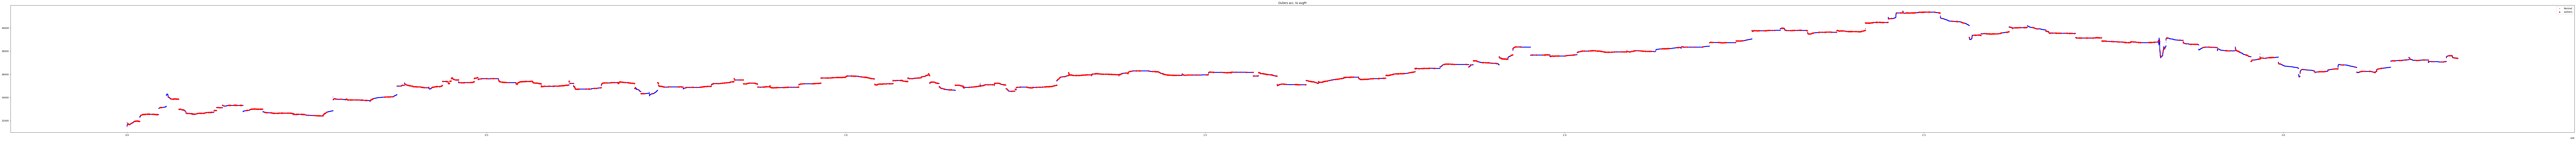

In [25]:
plt.figure(figsize=(200, 10))
plt.scatter([i for i in range(len(y_pred_avg)) if y_pred_avg[i] == 1], avg_prices[y_pred_avg == 1], color='blue', s=3, label='Normal')
plt.scatter([i for i in range(len(y_pred_avg)) if y_pred_avg[i] == -1],avg_prices[y_pred_avg == -1], color='red', s=20, label='outliers')
plt.title("Ouliers acc. to avgPr")
plt.legend()
plt.show()

### Volume

In [19]:
vol_X = [[x] for x in volume]

vol_lof = LocalOutlierFactor(n_neighbors=20, contamination=0.005)
y_pred_vol = vol_lof.fit_predict(vol_X)

print("Number of outliers:", len(y_pred_vol[y_pred_vol == -1]))

Number of outliers: 13122


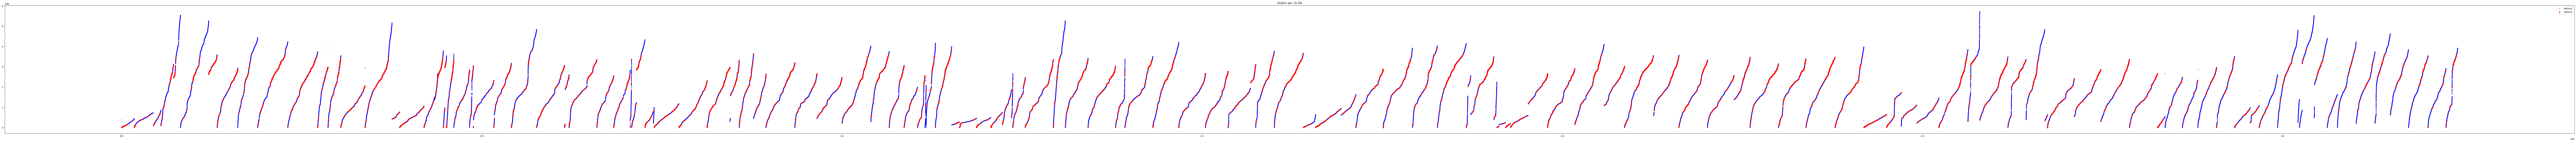

In [26]:
plt.figure(figsize=(200, 10))
plt.scatter([i for i in range(len(y_pred_vol)) if y_pred_vol[i] == 1], volume[y_pred_vol == 1], color='blue', s=3, label='Normal')
plt.scatter([i for i in range(len(y_pred_vol)) if y_pred_vol[i] == -1], volume[y_pred_vol == -1], color='red', s=20, label='outliers')
plt.title("Ouliers acc. to Vol")
plt.legend()
plt.show()

In [21]:
conf_out = [True if y_pred_avg[i] == -1 and y_pred_vol[i] == -1 else False for i in range(len(y_pred_avg)) ]
maybe_out = [True if y_pred_avg[i] == -1 and y_pred_vol[i] == 1 or y_pred_avg[i] == 1 and y_pred_vol[i] == -1 else False for i in range(len(y_pred_avg)) ]
not_out = [True if y_pred_avg[i] == 1 and y_pred_vol[i] == 1 else False for i in range(len(y_pred_avg)) ]

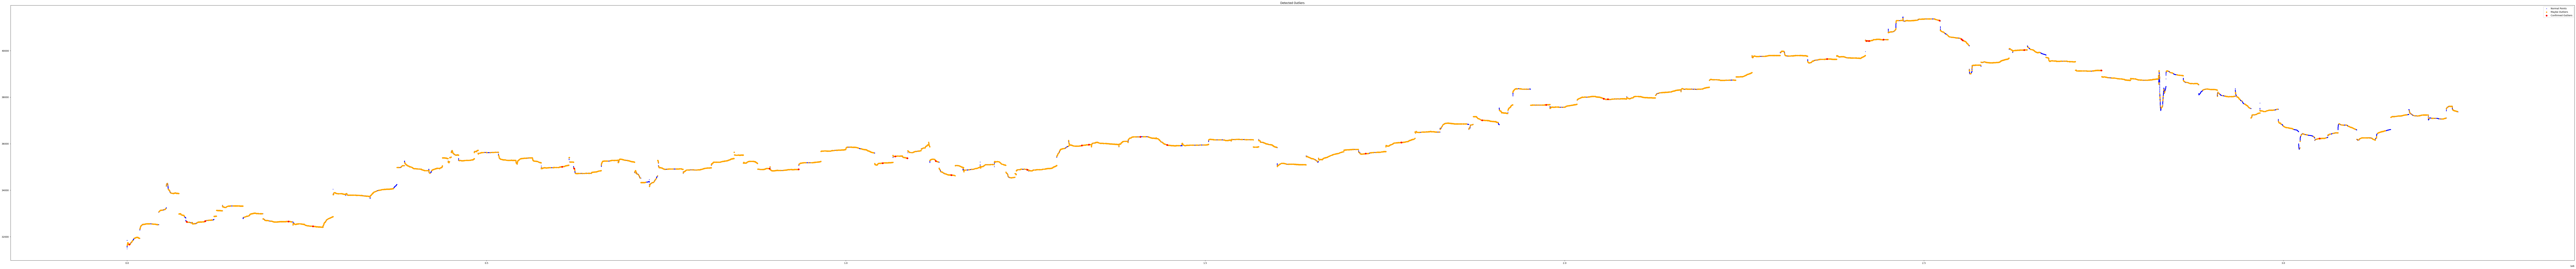

In [27]:
plt.figure(figsize=(200, 20))
plt.scatter([i for i in range(len(y_pred_avg)) if not_out[i]], avg_prices[not_out], color='blue', s=3, label='Normal Points')
plt.scatter([i for i in range(len(y_pred_avg)) if maybe_out[i]], avg_prices[maybe_out], color='orange', s=20, label='Maybe Outliers')
plt.scatter([i for i in range(len(y_pred_avg)) if conf_out[i]], avg_prices[conf_out], color='red', s=40, label='Confirmed Outliers')
plt.title("Detected Outliers")
plt.legend()
plt.show()